**DSC 680- Applied Data Science**
**<br>Week 4: Project 1 - Equipment Failure Prediction**
**<br>Author: Amit Saxena**
****

In [42]:
# Importing necessary libraries-

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GroupKFold
from sklearn.metrics import roc_auc_score

In [43]:
# Reading the testing and train datasets-

train = pd.read_csv('DSC680_1_train.csv', index_col='id')
test = pd.read_csv('DSC680_1_test.csv', index_col='id')

# Printing the shape of the datasets-
print('Train set shape:', train.shape)
print('Test set shape:', test.shape)

Train set shape: (26570, 25)
Test set shape: (20775, 24)


In [44]:
# Printing the head of training dataset-

train.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
id,,,,,,,,,,,,,,,,,,,,,
0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


In [45]:
# Printing the head of test dataset-

test.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
id,,,,,,,,,,,,,,,,,,,,,
26570,F,119.57,material_5,material_6,6,4,6,9,6,19.305,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
26571,F,113.51,material_5,material_6,6,4,11,8,0,17.883,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
26572,F,112.16,material_5,material_6,6,4,8,12,4,18.475,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
26573,F,112.72,material_5,material_6,6,4,8,11,10,16.518,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
26574,F,208.00,material_5,material_6,6,4,14,16,8,17.808,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044


In [77]:
# Summary of missing values-

mv=pd.DataFrame(train.isna().sum(), columns=['Number_missing (TRAIN)'])
mv['Percentage_missing (TRAIN)']=np.round(100*mv['Number_missing (TRAIN)']/len(train),2)
mv['----']=''
mv['Number_missing (TEST)']=test.isna().sum()
mv['Percentage_missing (TEST)']=np.round(100*mv['Number_missing (TEST)']/len(test),2)
mv

,Number_missing (TRAIN),Percentage_missing (TRAIN),----,Number_missing (TEST),Percentage_missing (TEST)
product_code,0,0.00,,0.0,0.00
loading,250,0.94,,223.0,1.07
attribute_0,0,0.00,,0.0,0.00
attribute_1,0,0.00,,0.0,0.00
attribute_2,0,0.00,,0.0,0.00
attribute_3,0,0.00,,0.0,0.00
measurement_0,0,0.00,,0.0,0.00
measurement_1,0,0.00,,0.0,0.00
measurement_2,0,0.00,,0.0,0.00
measurement_3,381,1.43,,329.0,1.58


**Missing values:**
- 54% of samples contain at least one missing value.
- Only continuous features (but not all of them) have missing values.
- The number of missing values steadily increases with measurement number.
- The failure rate is independent of the number of missing values.

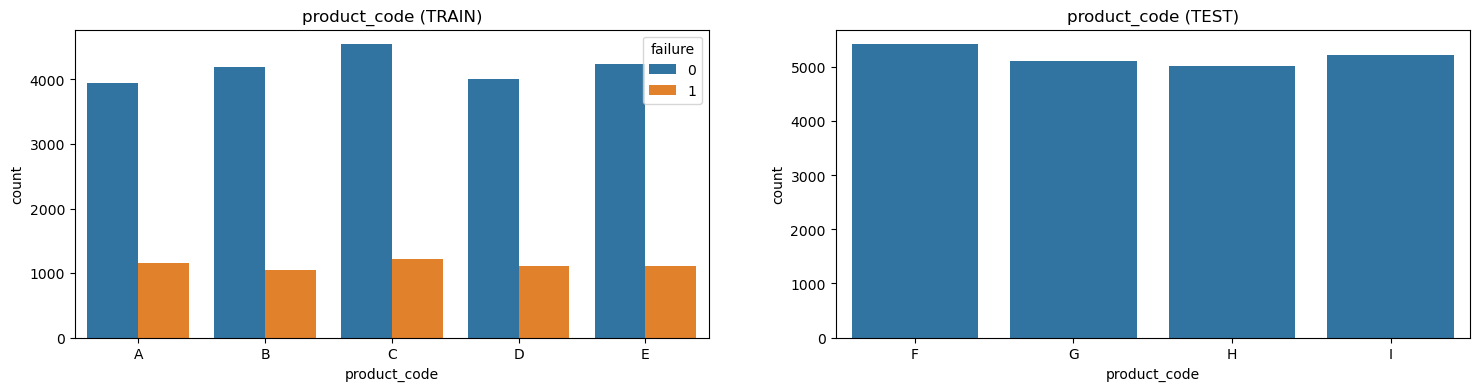

In [75]:
# Visualizing the product codes with failures-

plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
sns.countplot(data=train, x='product_code', hue='failure')
plt.title('product_code (TRAIN)')

plt.subplot(1,2,2)
sns.countplot(data=test, x='product_code')
plt.title('product_code (TEST)')

plt.show()

We could try to fill missing values according to the product codes.
We could use 5 fold cross validation, where the validation set in each fold is one of the product codes (i.e. GroupKFold).

**Replacing missing values**

The simplest way to impute missing values is to use the median for continuous features and the mode for discrete features. This works 'ok' in practice but is usually not optimal.

We'll use IterativeImputer, which models each feature with missing values as a function of other features in a round-robin fashion.

In [49]:
# Dropping the count column from the dataset-

train.drop('na_count', axis=1, inplace=True)

In [50]:
# Concatenating the datasets-

data = pd.concat([train.drop(['failure'], axis=1), test], axis=0)

In [51]:
%%time

# Fill missing values using the Iterative Imputer method-

num_cols = [col for col in train.columns[:-1] if (train[col].dtypes == 'float64') or 
            (train[col].dtypes == 'int64')]
for code in data['product_code'].unique():
    imputer = IterativeImputer(max_iter = 8, random_state = 0, skip_complete = True, 
                               n_nearest_features = 12)
    data.loc[data['product_code']==code,num_cols] = imputer.fit_transform(data.loc[data['product_code']==code,
                                                                          num_cols])

CPU times: user 15.9 s, sys: 3.58 s, total: 19.4 s
Wall time: 6.44 s


##### **Categorical encoding**

The most common approach to dealing with categorical data is to either use LabelEncoder or OneHotEncoder.

Label encoding replaces each category by an integer 0, 1, 2, etc.; whilst one hot encoding converts in category into a new column filled with 0's except when samples fall to that category which we denote by 1.

In [52]:
# One-hot encoding

encoded_columns = ['attribute_0', 'attribute_1']
for col in encoded_columns:
    tempdf = pd.get_dummies(data[col], prefix = col)
    data = pd.merge(left = data, right = tempdf, left_index = True, right_index = True)
data = data.drop(encoded_columns, axis = 1)

In [53]:
# Dropping the binary one-hot columns - cf 'dummy variable trap'

data.drop('attribute_0_material_5', axis=1, inplace=True)

In [54]:
# Printing the head of the dataset-

data.head()

,product_code,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,...,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,attribute_0_material_7,attribute_1_material_5,attribute_1_material_6,attribute_1_material_7,attribute_1_material_8
id,,,,,,,,,,,,,,,,,,,,,
0,A,80.10,9,5,7,8,4,18.040,12.518,15.748,...,15.029,15.500822,13.034,14.684,764.100,True,False,False,False,True
1,A,84.89,9,5,14,3,3,18.213,11.540,17.717,...,14.732,15.425000,14.395,15.631,682.057,True,False,False,False,True
2,A,82.43,9,5,12,1,5,18.057,11.652,16.738,...,16.711,18.631000,14.094,17.946,663.376,True,False,False,False,True
3,A,101.07,9,5,13,2,6,17.295,11.188,18.576,...,15.250,15.562000,16.154,17.172,826.282,True,False,False,False,True
4,A,188.06,9,5,9,2,8,19.346,12.950,16.990,...,16.182,12.760000,13.153,16.412,579.885,True,False,False,False,True


##### **Feature engineering**

In [55]:
# Removing the na columns from the dataframe-

data['measurement_3_na'] = data['measurement_3'].isna().astype(int)
data['measurement_5_na'] = data['measurement_5'].isna().astype(int)

In [56]:
# Converting attributes-

data['attribute_2*3'] = data['attribute_2'] * data['attribute_3']

In [57]:
# Modifying measurement group 1 and 2 columns-

meas_gr1_cols = [f"measurement_{i:d}" for i in list(range(3, 5)) + list(range(9, 17))]
data['meas_gr1_avg'] = np.mean(data[meas_gr1_cols], axis=1)
data['meas_gr1_std'] = np.std(data[meas_gr1_cols], axis=1)
meas_gr2_cols = [f"measurement_{i:d}" for i in list(range(5, 9))]
data['meas_gr2_avg'] = np.mean(data[meas_gr2_cols], axis=1)

In [58]:
# Displaying the data again afer feature engineering-

data.head()

,product_code,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,...,attribute_1_material_5,attribute_1_material_6,attribute_1_material_7,attribute_1_material_8,measurement_3_na,measurement_5_na,attribute_2*3,meas_gr1_avg,meas_gr1_std,meas_gr2_avg
id,,,,,,,,,,,,,,,,,,,,,
0,A,80.10,9,5,7,8,4,18.040,12.518,15.748,...,False,False,False,True,0,0,45,14.812382,2.133123,16.73350
1,A,84.89,9,5,14,3,3,18.213,11.540,17.717,...,False,False,False,True,0,0,45,15.000100,2.398674,16.56175
2,A,82.43,9,5,12,1,5,18.057,11.652,16.738,...,False,False,False,True,0,0,45,15.939335,2.668961,16.49600
3,A,101.07,9,5,13,2,6,17.295,11.188,18.576,...,False,False,False,True,0,0,45,14.983500,2.657732,17.13950
4,A,188.06,9,5,9,2,8,19.346,12.950,16.990,...,False,False,False,True,0,0,45,15.058200,3.031408,15.53375


In [59]:
# Re-splitting the data into train and test datasets-

train_split = data.iloc[:train.shape[0],:].copy()
test_split = data.iloc[train.shape[0]:,:].copy()

##### **Scaling**

Scaling makes the data more normally distributed and typically helps classification algorithms learn parameters faster.

We'll use StandardScaler which scales each column independently to have mean 0 and standard deviation 1, by subtracting by the column mean and dividing by the column standard deviation.

In [60]:
# Scaling the data-

scale_feats = [col for col in train_split.columns if train_split[col].dtypes == 'float64']
scaler = StandardScaler()

train_scaled = train_split.copy()
test_scaled = test_split.copy()
train_scaled[scale_feats] = scaler.fit_transform(train_split[scale_feats])
test_scaled[scale_feats] = scaler.transform(test_split[scale_feats])

In [61]:
# Printing the head of the scaled training dataset-

train_scaled.head()

,product_code,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,...,attribute_1_material_5,attribute_1_material_6,attribute_1_material_7,attribute_1_material_8,measurement_3_na,measurement_5_na,attribute_2*3,meas_gr1_avg,meas_gr1_std,meas_gr2_avg
id,,,,,,,,,,,,,,,,,,,,,
0,A,-1.228619,9,5,7,8,4,0.249649,0.794713,-1.397102,...,False,False,False,True,0,0,45,-0.713572,-1.802484,0.776864
1,A,-1.105309,9,5,14,3,3,0.423601,-0.193940,0.596808,...,False,False,False,True,0,0,45,-0.264370,-1.089449,0.433755
2,A,-1.168637,9,5,12,1,5,0.266743,-0.080720,-0.394577,...,False,False,False,True,0,0,45,1.983187,-0.363697,0.302405
3,A,-0.688785,9,5,13,2,6,-0.499451,-0.549774,1.466675,...,False,False,False,True,0,0,45,-0.304093,-0.393849,1.587939
4,A,1.550610,9,5,9,2,8,1.562836,1.231418,-0.139389,...,False,False,False,True,0,0,45,-0.125338,0.609514,-1.619903


In [62]:
# Printing the head of the scaled test dataset-

test_scaled.head()

,product_code,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,...,attribute_1_material_5,attribute_1_material_6,attribute_1_material_7,attribute_1_material_8,measurement_3_na,measurement_5_na,attribute_2*3,meas_gr1_avg,meas_gr1_std,meas_gr2_avg
id,,,,,,,,,,,,,,,,,,,,,
26570,F,-0.212537,6,4,6,9,6,1.521611,-1.570775,0.411493,...,False,True,False,False,0,0,24,-0.271309,0.308467,0.287422
26571,F,-0.368541,6,4,11,8,0,0.091785,0.197275,0.101622,...,False,True,False,False,0,0,24,-0.439715,-1.396435,-0.784356
26572,F,-0.403294,6,4,8,12,4,0.687043,-1.264475,-0.515083,...,False,True,False,False,0,0,24,-0.522092,0.157945,-0.334869
26573,F,-0.388878,6,4,8,11,10,-1.280726,-0.853042,-1.857858,...,False,True,False,False,0,0,24,-1.615199,-0.853110,-0.620043
26574,F,2.063928,6,4,14,16,8,0.016373,0.971619,0.557315,...,False,True,False,False,0,0,24,-0.272745,-1.662582,0.342359


**Feature selection-**

The aim of feature selection is to drop redundant features to reduce the chance of our models overfitting to noise. There are several ways to do this, e.g. by using metrics like correlation coeffecient, Mutual Information, Fisher Information, etc. 

We'll use Fisher Information, which tells us how much information about an unknown parameter we can get from a sample.

Reference- https://www.kaggle.com/code/heyspaceturtle/feature-selection-is-all-u-need-2

In [63]:
# Defining the FisherScore function-

def FisherScore(bt, y_train, predictors):
    """
    Verbeke, W., Dejaeger, K., Martens, D., Hur, J., & Baesens, B. (2012). New insights
    into churn prediction in the telecommunication sector: A profit driven data mining
    approach. European Journal of Operational Research, 218(1), 211-229.
    """
    
    # Get the unique values of dependent variable
    target_var_val = y_train.unique()
    
    # Calculate FisherScore for each predictor
    predictor_FisherScore = []
    for v in predictors:
        fs = np.abs(np.mean(bt.loc[y_train == target_var_val[0], v]) - np.mean(bt.loc[y_train == target_var_val[1], v])) / \
             np.sqrt(np.var(bt.loc[y_train == target_var_val[0], v]) + np.var(bt.loc[y_train == target_var_val[1], v]))
        predictor_FisherScore.append(fs)
    return predictor_FisherScore

In [64]:
# Calculating Fisher Score for all variables-

fs = FisherScore(train_scaled, train['failure'], train_scaled.drop('product_code', axis=1).columns)
fs_df = pd.DataFrame({"predictor":train_scaled.drop('product_code', axis=1).columns, 
                      "fisherscore":fs})
fs_df = fs_df.sort_values('fisherscore', ascending=False).reset_index(drop=True)
fs_df.head(10)

,predictor,fisherscore
0,loading,0.217018
1,meas_gr2_avg,0.057522
2,measurement_17,0.055936
3,attribute_3,0.033091
4,measurement_5,0.030981
5,measurement_8,0.030665
6,measurement_7,0.029059
7,measurement_2,0.027061
8,attribute_2*3,0.026810
9,attribute_0_material_7,0.025840


In [65]:
# Selecting features-

keep_feats = fs_df['predictor'][:10]
train_final = train_scaled[keep_feats]
test_final = test_scaled[keep_feats]

In [66]:
# Printing the shape and head of the final training data-

print(train_final.shape)
train_final.head()

(26570, 10)


,loading,meas_gr2_avg,measurement_17,attribute_3,measurement_5,measurement_8,measurement_7,measurement_2,attribute_2*3,attribute_0_material_7
id,,,,,,,,,,
0,-1.228619,0.776864,0.506776,5,-1.397102,1.129410,0.021811,4,45,True
1,-1.105309,0.433755,-0.157849,5,0.596808,-1.132415,1.042594,3,45,True
2,-1.168637,0.302405,-0.309183,5,-0.394577,-0.734150,1.012243,5,45,True
3,-0.688785,1.587939,1.010508,5,1.466675,0.036428,0.875667,6,45,True
4,1.550610,-1.619903,-0.985538,5,-0.139389,-0.928790,-0.416245,8,45,True


In [67]:
# Printing the shape and head of the final test data-

print(test_final.shape)
test_final.head()

(20775, 10)


,loading,meas_gr2_avg,measurement_17,attribute_3,measurement_5,measurement_8,measurement_7,measurement_2,attribute_2*3,attribute_0_material_7
id,,,,,,,,,,
26570,-0.212537,0.287422,-0.542198,4,0.411493,-0.368824,-0.120835,6,24,False
26571,-0.368541,-0.784356,-1.332647,4,0.101622,0.343860,-0.544728,0,24,False
26572,-0.403294,-0.334869,-0.344673,4,-0.515083,-1.247203,0.413330,4,24,False
26573,-0.388878,-0.620043,-0.868755,4,-1.857858,-0.075366,-0.418268,10,24,False
26574,2.063928,0.342359,0.806057,4,0.557315,0.117278,1.733569,8,24,False


#### **Modelling**

- We'll use Logistic Regression model.
- We use 5 fold cross validation grouped by product_code.
- Hyperparameters are tuned using grid search.

Reference- https://www.kaggle.com/code/ambrosm/tpsaug22-eda-which-makes-sense

In [68]:
%%time

# Defining AUC list-

auc_list = []
test_pred_list = []
importance_list = []
kf = GroupKFold(n_splits=5)   # grouped by product_code
for fold, (idx_tr, idx_va) in enumerate(kf.split(X=train, y=train['failure'], groups=train['product_code'])):
    X_tr = train_final.iloc[idx_tr]
    X_va = train_final.iloc[idx_va]
    y_tr = train.loc[idx_tr,'failure']
    y_va = train.loc[idx_va,'failure']
    
    clf = LogisticRegression(max_iter = 200, C=0.05, penalty='l1', solver='liblinear')
    
    clf.fit(X_tr, y_tr)
    importance_list.append(clf.coef_.ravel())
    
    # Validate model
    va_preds = clf.predict_proba(X_va)[:,1]
    score = roc_auc_score(y_va, va_preds)
    print(f"Fold {fold}: auc = {score:.5f}")
    auc_list.append(score)
    
    # Test set predictions
    test_pred_list.append(clf.predict_proba(test_final)[:,1])
    

Fold 0: auc = 0.58523
Fold 1: auc = 0.58438
Fold 2: auc = 0.59137
Fold 3: auc = 0.59959
Fold 4: auc = 0.59137
CPU times: user 1.97 s, sys: 17.1 ms, total: 1.99 s
Wall time: 1.99 s


In [69]:
print(f'Average auc = {sum(auc_list) / len(auc_list):.5f}')
print('')
preds = sum(test_pred_list)/len(test_pred_list)

Average auc = 0.59039



In [70]:
# Final predictions-

final_pred = pd.DataFrame({'id': test.index,'failure': preds})

In [71]:
# Extracting indexes-

code_F = test[test['product_code']=='F'].index
code_GHI = test[test['product_code']!='F'].index

In [72]:
# Extracting the final predictions-

final_pred.to_csv('final_pred.csv', index=False)
print(final_pred.shape)

(20775, 2)


In [74]:
# Printing the head of final predictions with chances of failures-

final_pred.head(10)

,id,failure
0,26570,0.303739
1,26571,0.269176
2,26572,0.284701
3,26573,0.288706
4,26574,0.472480
5,26575,0.264681
6,26576,0.251204
7,26577,0.341866
8,26578,0.223107
9,26579,0.269733


****
****